In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

# Analise Preliminar 


In [4]:
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
738,739,Ana Silva,F,3/24/1979
107,108,Emily Ribeiro,F,7/5/1994
373,374,André Alves,M,8/3/1962
823,824,Rafaela Sousa,F,5/21/1936
222,223,Martim Carvalho,M,7/21/1965


In [5]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [6]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [7]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [8]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


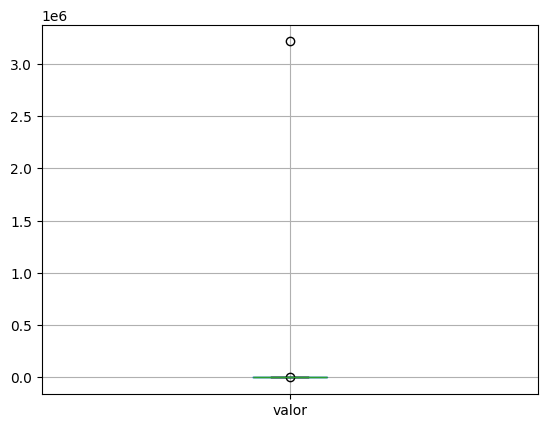

In [9]:
dfProdutos.boxplot(column=['valor'])
plt.show()

In [10]:
dfProdutos[dfProdutos.valor>=3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


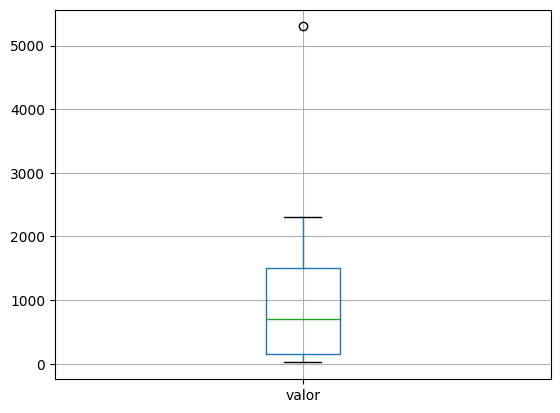

In [11]:
dfProdutos[dfProdutos.valor<3000000].boxplot(column=['valor'])
plt.show()

In [12]:
dfVendas[dfVendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [13]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [14]:
dfPag.isnull().sum()


id          0
id_venda    0
dt_pgto     0
dtype: int64

## DATA CLEANNING

### DADOS NULOS

In [15]:
dfVendas[dfVendas.id_cliente ==264]

,id,id_cliente,id_loja,id_produto,dt_venda
229,230,264,2,3,2018-03-28
562,563,264,5,3,2018-07-07
1438,1439,264,3,3,2019-04-29
2021,2022,264,6,3,2019-11-08
2877,2878,264,10,3,2020-08-14


In [20]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.nome.isnull(), 'sexo'] = '0'
dfClientes.loc[dfClientes.nome.isnull(), 'dt_nasc'] = '1/1/2020'

In [22]:
dfClientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,NaN
287,288,Victor Ribeiro,NaN,12/17/1974


In [23]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       4
dt_nasc    4
dtype: int64

In [24]:
dfPag.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

## OUTLIERS

In [25]:
dfProdutos.loc[9,'valor'] = dfProdutos.valor[9]/1000
dfProdutos


,id,produto,valor
0,1,mouse,20.000
1,2,teclado,30.000
2,3,laptop básico,2300.000
3,4,laptop gamer,5300.000
4,5,monitor,1500.000
5,6,impressora,700.000
6,7,carregador,150.000
7,8,cadeira,540.000
8,9,mesa,860.000
9,10,xxx-231a,3211.352


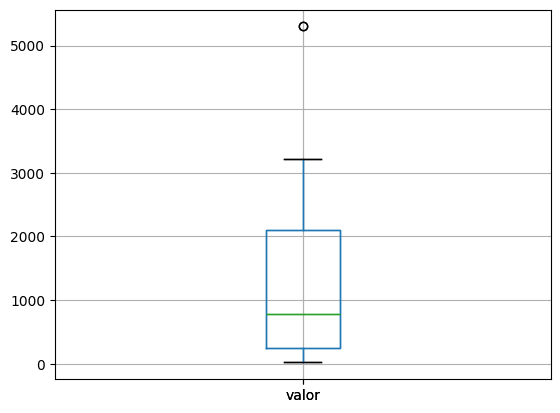

In [27]:
dfProdutos.boxplot(column=['valor'])
plt.show()

### CONSISTÊNCIA

In [29]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [30]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [31]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [32]:
dfPag[~dfPag.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [34]:
dfVendas[~dfVendas.id.isin(dfPag.id_venda)].count()


id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64